In [1]:
# To run this example (kafka 2.1.13, ubuntu 22)
# - take a look at https://kafka.apache.org/quickstart
# - start by starting zookeeper UNDER kafka:
# $ <KAFKA_HOME>/bin/zookeeper-server-start.sh ../config/zookeeper.properties

# 1) Start the Kafka broker service in another terminal
# $ <KAFKA_HOME>/bin/kafka-server-start.sh ../config/server.properties

# 2) If needed, create a Kafka topic:
#create topic:
# $<KAFKA_HOME>/bin/kafka-topics.sh --create --topic quickstart-events --bootstrap-server localhost:9092


# 3) Watch for messages: 
#read (consumer)
# $<KAFKA_HOME>/bin//kafka-console-consumer.sh --topic quick-start-events --from-beginning --bootstrap-server localhost:9092

# 4) Run the cells below
# the idea is to plot a map and add a listener for the mouse
# The mouse events are filtered. Every click will print out the coordinates
# Interact with the map. You will see every click prints out the coordinates.
# Moreover, keep an eye the command window listening for events (step 3))
# If everything works well, you'll see the coordinates being consumed by Kafka

In [ ]:
# import necessary packages to work with spatial data in Python
import os 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import earthpy as et 

In [3]:
## instaling pandasql
## https://towardsdatascience.com/how-to-use-sql-in-pandas-62d8a0f6341

import sys
!{sys.executable} -m pip install kafka-python

In [4]:
pathPrefix = "/usr/local/Downloads/DataSets/Curitiba/"
pathBairros = "DivisaBairros/"
pathEixoRuas ="EixoRua/"
pathLotes = "Lotes/"

In [5]:
### bairros
bairroFile="DIVISA_DE_BAIRROS"
bairroShp = bairroFile + ".shp"
#bairroShx = bairroFile +".shx"
##bairroSbn = bairroFile +".sbn"
##bairroSbx = bairroFile +".sbx"

bairros = gpd.read_file(pathPrefix+pathBairros+bairroShp)
#bairrosShx = gpd.read_file(pathPrefix+pathBairros+bairroShx)
##bairrosSbn = gpd.read_file(pathPrefix+pathBairros+bairroSbn)
##bairrosSbx = gpd.read_file(pathPrefix+pathBairros+bairroSbx)

lotesFile="LOTES_201902"
lotesShp=lotesFile+".shp"
lotes=gpd.read_file(pathPrefix+pathLotes+lotesShp)

In [6]:
### eixo ruas
ruasShp = "EIXO_RUA.shp"
ruas = gpd.read_file(pathPrefix+pathEixoRuas+ruasShp)

In [7]:
type(bairros)

geopandas.geodataframe.GeoDataFrame

In [8]:
bairros.head(10)

,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry
0,20,9.0,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.0,REGIONAL PORTÃO,4.773046e+06,9760.918367,"POLYGON ((673879.287 7183803.691, 673907.541 7..."
1,22,18.0,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.0,REGIONAL MATRIZ,1.958422e+06,6055.953058,"POLYGON ((678071.018 7187798.489, 678071.550 7..."
2,23,57.0,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.0,REGIONAL BOQUEIRÃO,9.085391e+06,13783.592828,"POLYGON ((674448.852 7179898.885, 674532.900 7..."
3,5,22.0,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.0,REGIONAL CAJURU,3.859034e+06,8818.503767,"POLYGON ((678209.542 7181641.525, 678107.870 7..."
4,9,26.0,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.0,REGIONAL PORTÃO,2.311397e+06,6351.958996,"POLYGON ((672709.614 7181167.829, 672599.420 7..."
5,14,36.0,DIVISA DE BAIRROS,BAIRRO ALTO,Decreto Municipal 774 / 1975,4.0,REGIONAL BOA VISTA,7.201073e+06,13889.879150,"POLYGON ((680360.799 7189708.362, 680360.870 7..."
6,16,2.0,DIVISA DE BAIRROS,SÃO FRANCISCO,Decreto Municipal 774 / 1975,1.0,REGIONAL MATRIZ,1.354452e+06,4643.176821,"POLYGON ((673786.570 7186540.310, 673712.969 7..."
7,17,4.0,DIVISA DE BAIRROS,ALTO DA GLÓRIA,Decreto Municipal 774 / 1975,1.0,REGIONAL MATRIZ,8.754829e+05,4057.148902,"POLYGON ((674708.314 7187928.135, 674708.640 7..."
8,21,55.0,DIVISA DE BAIRROS,ATUBA,Decreto Municipal 774 / 1975,4.0,REGIONAL BOA VISTA,4.159365e+06,11301.951647,"POLYGON ((680394.440 7192647.620, 680395.280 7..."
9,25,16.0,DIVISA DE BAIRROS,CABRAL,Decreto Municipal 774 / 1975,1.0,REGIONAL MATRIZ,2.026591e+06,6406.086114,"POLYGON ((676969.895 7188558.751, 676968.380 7..."


In [9]:
# coord ref system
print(bairros.crs)
print(ruas.crs)
print(lotes.crs)

epsg:29192
epsg:29192
epsg:29192


In [10]:
bairros.crs


<Projected CRS: EPSG:29192>
Name: SAD69 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - onshore and offshore northern and southern hemispheres between 54°W and 48°W. In remainder of South America - between 54°W and 48°W, southern hemisphere, onshore.
- bounds: (-54.0, -35.71, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: South American Datum 1969
- Ellipsoid: GRS 1967 Modified
- Prime Meridian: Greenwich

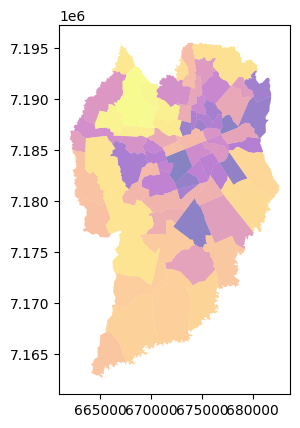

In [11]:
### create the plot
fig, ax = plt.subplots()

# add dataframes to the plot
bairros.plot(cmap='plasma', ax=ax, alpha=.5)
plt.show()

In [12]:
fig, ax = plt.subplots()
ruas.plot(cmap='YlOrBr', ax=ax, alpha=.5)
##ax.set(xlim=[-57, -34], ylim=[-50, 9])

<AxesSubplot:>

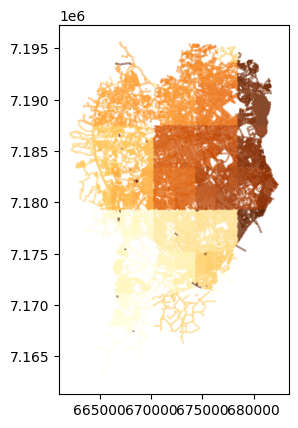

In [13]:
plt.show()

In [14]:
fig, ax = plt.subplots()
lotes.plot(cmap='plasma', ax=ax, alpha=.5)

<AxesSubplot:>

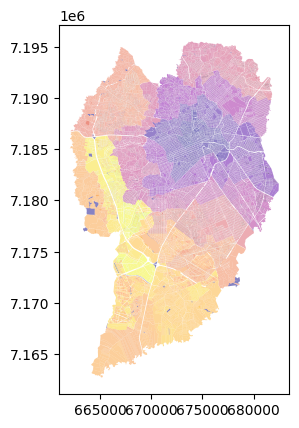

In [15]:
plt.show()

In [16]:
from ipyleaflet import Map, Marker, Polyline
import osmnx as ox
## https://github.com/gboeing/osmnx-examples/blob/main/notebooks/01-overview-osmnx.ipynb
%matplotlib inline
ox.__version__

'1.1.1'

In [17]:
curitiba = ox.geocode_to_gdf("Curitiba")

In [18]:
type(curitiba)



geopandas.geodataframe.GeoDataFrame

In [19]:
curitiba.lat[0]

-25.496081949999997

In [20]:
curitiba.lon[0]

-49.28434174099833

In [21]:
#https://ipyleaflet.readthedocs.io/en/latest/api_reference/marker.html
class Location:
    def __init__(self, pLat=36.3, pLong=137.97):
        self.latitude =pLat
        self.longitude=pLong

In [22]:
locCuritiba = Location(curitiba.lat[0], curitiba.lon[0])

In [23]:
locCuritiba

In [24]:
loc = locCuritiba
center = (loc.latitude, loc.longitude)

m = Map(center=center, zoom=15)

marker = Marker(location=center, draggable=True)
m.add_layer(marker);

display(m)

# Now that the marker is on the Map, you can drag it with your mouse,
# it will automatically update the `marker.location` attribute in Python

# You can also update the marker location from Python, that will update the
# marker location on the Map:
marker.location = (loc.latitude, loc.longitude)

Map(center=[-25.496081949999997, -49.28434174099833], controls=(ZoomControl(options=['position', 'zoom_in_text…

In [ ]:
ax = bairros.plot(fc="gray", ec="none")

In [ ]:
ruas.plot()

In [ ]:
type(ax)

In [ ]:
lotes.plot(ax=ax)

In [ ]:
type(plt)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
lotes.plot(ax=ax)


In [ ]:
bairros.plot()

In [ ]:
plt.show()

In [25]:
import folium
import matplotlib.pyplot as plt

In [26]:
curitiba.lat[0]

-25.496081949999997

In [27]:
m = folium.Map(location=[curitiba.lat[0], curitiba.lon[0]], zoom_start=10
, tiles='CartoDB positron')
m

In [28]:
#ax = curitiba.plot(facecolor='black')
## restaurants
## https://automating-gis-processes.github.io/CSC/notebooks/L3/retrieve_osm_data.html
amenities = ox.geometries.geometries_from_address("Curitiba", tags={'amenity':True}, dist=1000)


In [29]:
type(amenities)

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geopandas.geodataframe.GeoDataFrame

In [30]:
amenities.head(10)

amenity                             name  \
element_type osmid                                                          
node         564213958        university              FAE Business School   
             716041890        restaurant                       Baba Salim   
             768565891        restaurant              Mafalda Café Bistrô   
             768566109              taxi                              NaN   
             839605959         fast_food                           Madero   
             839605963           parking           Estacionamento Estacao   
             839605964  parking_entrance  Estacionamento Shopping Estação   
             840597258         fast_food                   Pastel na Hora   
             842326355           parking            Estacionamento Guaira   
             842326368           parking                              NaN   

                         wikidata                     geometry   cuisine  \
element_type osmid                                                         
node         564213958  Q10278991  POINT (-49.27351 -25.43831)       NaN   
             716041890        NaN  POINT (-49.26541 -25.42772)      arab   
             768565891        NaN  POINT (-49.26448 -25.42783)       NaN   
             768566109        NaN  POINT (-49.26213 -25.42765)       NaN   
             839605959        NaN  POINT (-49.26674 -25.43843)  sandwich   
             839605963        NaN  POINT (-49.26596 -25.43835)       NaN   
             839605964        NaN  POINT (-49.26580 -25.43825)       NaN   
             840597258        NaN  POINT (-49.26600 -25.42796)  sandwich   
             842326355        NaN  POINT (-49.26375 -25.42953)       NaN   
             842326368        NaN  POINT (-49.26612 -25.43017)       NaN   

                                                            opening_hours  \
element_type osmid                                                          
node         564213958                                                NaN   
             716041890                                                NaN   
             768565891  Mo-Fr 11:30-14:00,18:00-01:00; Sa,PH 19:00-01:...   
             768566109                                                NaN   
             839605959                                                NaN   
             839605963                                                NaN   
             839605964                                                NaN   
             840597258                                                NaN   
             842326355                                                NaN   
             842326368                                                NaN   

                       wheelchair capacity:disabled capacity:parent  \
element_type osmid                                                    
node         564213958        NaN               NaN             NaN   
             716041890        NaN               NaN             NaN   
             768565891        NaN               NaN             NaN   
             768566109        NaN               NaN             NaN   
             839605959        yes               NaN             NaN   
             839605963        yes                 3         unknown   
             839605964        NaN               NaN             NaN   
             840597258        NaN               NaN             NaN   
             842326355        NaN               yes              no   
             842326368        NaN               yes             NaN   

                       capacity:women  ... building:use isced:level min_age  \
element_type osmid                     ...                                    
node         564213958            NaN  ...          NaN         NaN     NaN   
             716041890            NaN  ...          NaN         NaN     NaN   
             768565891            NaN  ...          NaN         NaN     NaN   
             768566109

In [ ]:
ax = curitiba.plot(facecolor='black')

In [ ]:
type(ax)

In [ ]:
# Plot restaurants
amenities.plot(ax=ax, color='green', alpha=0.7, markersize=10)
plt.tight_layout()

In [ ]:
plt

In [31]:
### https://medium.com/swlh/how-to-use-mouse-events-on-ipyleaflet-4d002097efc0
### How to Use Mouse Events on Ipyleaflet

from ipyleaflet import *
center = (curitiba.lat[0], curitiba.lon[0])
m = Map(center=center)
m

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Map(center=[-25.496081949999997, -49.28434174099833], controls=(ZoomControl(options=['position', 'zoom_in_text…

In [ ]:
### 'https://nominatim.openstreetmap.org/search?format=json&limit=1&dedupe=0&q='
search = SearchControl(position='topleft', 
 url=
'https://nominatim.openstreetmap.org/search?format=json&q={s}', 
 zoom=5,
 property_name='display_name',
 marker=marker
 )
m.add_control(search)

In [32]:
### adding layer
amenities_geoData = GeoData(geo_dataframe = amenities,
    style={'color':'black', 'opacity':0.07}
    , hover_style={'fillColor':'red', 'fillOpacity':0.1, 'title':'xxx'}
    , name='amenities') unsupported operand type(s) for &: 'str' and 'str'
m.add_layer(amenities_geoData)

SyntaxError: invalid syntax (<ipython-input-32-e40ee86797ec>, line 5)

In [ ]:
m

In [ ]:
### https://medium.com/swlh/how-to-use-mouse-events-on-ipyleaflet-4d002097efc0
### This function will be called as a callback on click marker event.
def handle_click(**kwargs):
    print(kwargs)

In [ ]:
marker.on_click(handle_click)

In [ ]:
### Another way to listen to events is using the observe function, 
###that is called each time that an element change your state in the map.
def handle_observe(event):
    print(event)

In [ ]:
marker = Marker(location=center, draggable=True)
m.add_layer(marker)

In [ ]:
marker.observe(handle_observe, 'location')

In [ ]:
### Last but not least, you can create a function that interacts with all 
### the mouse events on your main map element, like the hover the map, 
### clicks and all the types of map events.
def handle_map_interaction(**kwargs):
    print(kwargs)

In [ ]:
m.on_interaction(handle_map_interaction)

In [33]:
from kafka import KafkaProducer

In [34]:
### https://towardsdatascience.com/kafka-python-explained-in-10-lines-of-code-800e3e07dad1
### https://kafka-python.readthedocs.io/en/master/usage.html#kafkaproducer

#producer = KafkaProducer(bootstrap_servers=['localhost:9092'])
producer = KafkaProducer(bootstrap_servers=['localhost:9092'], 
                        value_serializer=lambda m: json.dumps(m).encode('utf-8'))

In [35]:
### And you can filter the event inside the function definition:
def filtered_map_interactions(**kwargs):
 #if kwargs.get(‘type’) == ‘mouseup’:
 #print(‘This is a mouse up event’)
 #if kwargs.get(‘type’) == ‘preclick’:
 #print(‘This is a pre click event’)
    k_topic = 'quickstart-events'

    arg_type = kwargs.get('type') 
    if ((arg_type != 'click') and (arg_type != 'dblclick')):
        return
    if kwargs.get('type') == 'click':
        print('This is a click event')
        print(kwargs)
    if kwargs.get("type") == 'dblclick':
        print("This is a 2x click event")
        print(kwargs)
    data = {'message' : kwargs}
    producer.send(k_topic, value=data)

In [36]:
### listen only to filtered actions
m.on_interaction(filtered_map_interactions)

In [181]:
##m=None
##filtered_map_interactions = None
##m.on_interaction = None


AttributeError: 'NoneType' object has no attribute 'on_interaction'

In [37]:
### https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Connecting%20with%20the%20Qt%20Console.html
### how print output to console jupyter
%connect_info

{
  "shell_port": 51061,
  "iopub_port": 57185,
  "stdin_port": 42289,
  "control_port": 35945,
  "hb_port": 36625,
  "ip": "127.0.0.1",
  "key": "639224f4-794d536999b254afa1465b1d",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-fe4fbea6-a135-478b-8644-64746c78ff82.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [38]:
%qtconsole

/usr/lib/python3.8/subprocess.py:946: ResourceWarning: subprocess 16834 is still running
  _warn("subprocess %s is still running" % self.pid,
